### Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [49]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn as sk 
import psycopg2 as psy
import seaborn as sns
%matplotlib inline

#### Step 2: Examine your data 

In [78]:
airport1 = pd.read_csv("/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-07/assets/airport_cancellations.csv")

In [79]:
airport1.head(2)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0


In [76]:
airport2 = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-07/assets/Airport_operations.csv')

In [77]:
airport2.head(2)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.814,0.7922,0.8001,9.60,9.79,2.29,11.2,2.26,0.89,2.34,10.24


In [89]:
# check null values
airport1.isnull().sum()

Airport                    0
Year                       0
Departure Cancellations    0
Arrival Cancellations      0
Departure Diversions       0
Arrival Diversions         0
dtype: int64

In [90]:
# check null values
airport2.isnull().sum()

airport                               0
year                                  0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
dtype: int64

In [83]:
# print shape of columns
print 'airport1 shape: ' , airport1.shape
print 'airport2 shape: ' , airport2.shape

airport1 shape:  (805, 6)
airport2 shape:  (841, 15)


In [85]:
# print unique values
print 'airport1 unique values: ' , airport1['Airport'].unique()
print 'airport2 unique values: ' , airport2['airport'].unique()

airport1 unique values:  ['ABQ' 'ANC' 'ATL' 'AUS' 'BDL' 'BHM' 'BNA' 'BOS' 'BUF' 'BUR' 'BWI' 'CLE'
 'CLT' 'CVG' 'DAL' 'DAY' 'DCA' 'DEN' 'DFW' 'DTW' 'EWR' 'FLL' 'HNL' 'HOU'
 'HPN' 'IAD' 'IAH' 'IND' 'ISP' 'JAX' 'JFK' 'LAS' 'LAX' 'LGA' 'LGB' 'MCI'
 'MCO' 'MDW' 'MEM' 'MHT' 'MIA' 'MKE' 'MSP' 'MSY' 'OAK' 'OGG' 'OMA' 'ONT'
 'ORD' 'OXR' 'PBI' 'PDX' 'PHL' 'PHX' 'PIT' 'PSP' 'PVD' 'RDU' 'RFD' 'RSW'
 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SJU' 'SLC' 'SMF' 'SNA' 'STL' 'SWF'
 'TPA' 'TUS']
airport2 unique values:  ['ABQ' 'ANC' 'ATL' 'AUS' 'BDL' 'BHM' 'BNA' 'BOS' 'BUF' 'BUR' 'BWI' 'CLE'
 'CLT' 'CVG' 'DAL' 'DAY' 'DCA' 'DEN' 'DFW' 'DTW' 'EWR' 'FLL' 'GYY' 'HNL'
 'HOU' 'HPN' 'IAD' 'IAH' 'IND' 'ISP' 'JAX' 'JFK' 'LAS' 'LAX' 'LGA' 'LGB'
 'MCI' 'MCO' 'MDW' 'MEM' 'MHT' 'MIA' 'MKE' 'MSP' 'MSY' 'OAK' 'OGG' 'OMA'
 'ONT' 'ORD' 'OXR' 'PBI' 'PDX' 'PHL' 'PHX' 'PIT' 'PSP' 'PVD' 'RDU' 'RFD'
 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SJU' 'SLC' 'SMF' 'SNA' 'STL'
 'SWF' 'TEB' 'TPA' 'TUS' 'VNY']


In [9]:
airport1.isnull().sum()

Airport                    0
Year                       0
Departure Cancellations    0
Arrival Cancellations      0
Departure Diversions       0
Arrival Diversions         0
dtype: int64

In [13]:
airport2['airport'].unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'GYY', 'HNL', 'HOU', 'HPN', 'IAD',
       'IAH', 'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB',
       'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY',
       'OAK', 'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL',
       'PHX', 'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT',
       'SDF', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL',
       'SWF', 'TEB', 'TPA', 'TUS', 'VNY'], dtype=object)

In [12]:
airport2.isnull().sum()

airport                               0
year                                  0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
dtype: int64

In [14]:
airport3 = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-07/assets/airports.csv')

In [15]:
airport3.head(2)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No


In [92]:
airport3.shape

(5167, 13)

In [19]:
airport3['FAA REGION'].unique()

array(['ASO', 'AWP', 'ASW', 'ACE', 'AEA', 'ANM', 'AGL', 'ANE', 'AAL', nan], dtype=object)

In [21]:
print airport3['LocID'].unique()

['STX' 'X64' 'PSE' ..., 'ATK' 'AWI' 'BRW']


In [18]:
airport1.head(2)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0


In [ ]:
airport3['']

### Intro: Write a problem statement / aim for this project

We want to understand the behavior of flight cancellations
Answer: 

First, I'm going to drop Years because we're going to look at airports overall performance regarldess of time of year. 

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [ ]:
postgres -D /usr/local/pgsql/data >logfile 2>&1 
createdb mydb

Load our csv files into tables

In [26]:
airport2.head(1)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87


In [62]:
# drop year from airport2
# del airport2['year']
Ops = airport2

In [42]:
Ops.head(1)

,airport,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87


In [72]:
Ops.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
dtype: object

In [36]:
airport1.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0


In [63]:
# drop year from airport1
# del airport1['Year']
Cancel = airport1

In [68]:
# rename so columns can merge
Cancel.rename(columns={'Airport': 'airport', 'Year':'year'}, inplace=True)


In [69]:
Cancel.head(1)

,airport,year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0


In [71]:
# year is an int so lets change year to a flaot as well
Cancel.dtypes

airport                     object
year                       float64
Departure Cancellations    float64
Arrival Cancellations      float64
Departure Diversions       float64
Arrival Diversions         float64
dtype: object

In [74]:
Cancel['year'].astype(int)

In [75]:
Cancel.dtypes

dtype('int64')

Join airport_cancellations.csv and airports.csv into one table

In [66]:
overallOperations = pd.merge(Cancel, Ops)

Query the database for our intial data

In [67]:
overallOperations.tail()

,airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
8784,TUS,2014.0,178.0,155.0,55.0,39.0,2010,24995,25088,0.8502,0.8293,0.7926,8.27,10.48,2.01,9.38,1.64,0.76,2.33,11.04
8785,TUS,2014.0,178.0,155.0,55.0,39.0,2011,25149,25165,0.8458,0.8216,0.7795,8.76,11.06,2.58,10.17,1.47,0.80,2.57,11.77
8786,TUS,2014.0,178.0,155.0,55.0,39.0,2012,23583,23679,0.8599,0.8336,0.7965,8.10,11.19,2.59,9.48,1.56,0.74,2.29,10.64
8787,TUS,2014.0,178.0,155.0,55.0,39.0,2013,22502,22090,0.8145,0.7914,0.7628,10.55,11.43,2.43,11.96,1.67,0.70,2.48,12.76
8788,TUS,2014.0,178.0,155.0,55.0,39.0,2014,22589,22340,0.7914,0.7715,0.7351,12.33,11.32,2.03,13.47,1.84,0.92,2.57,14.76


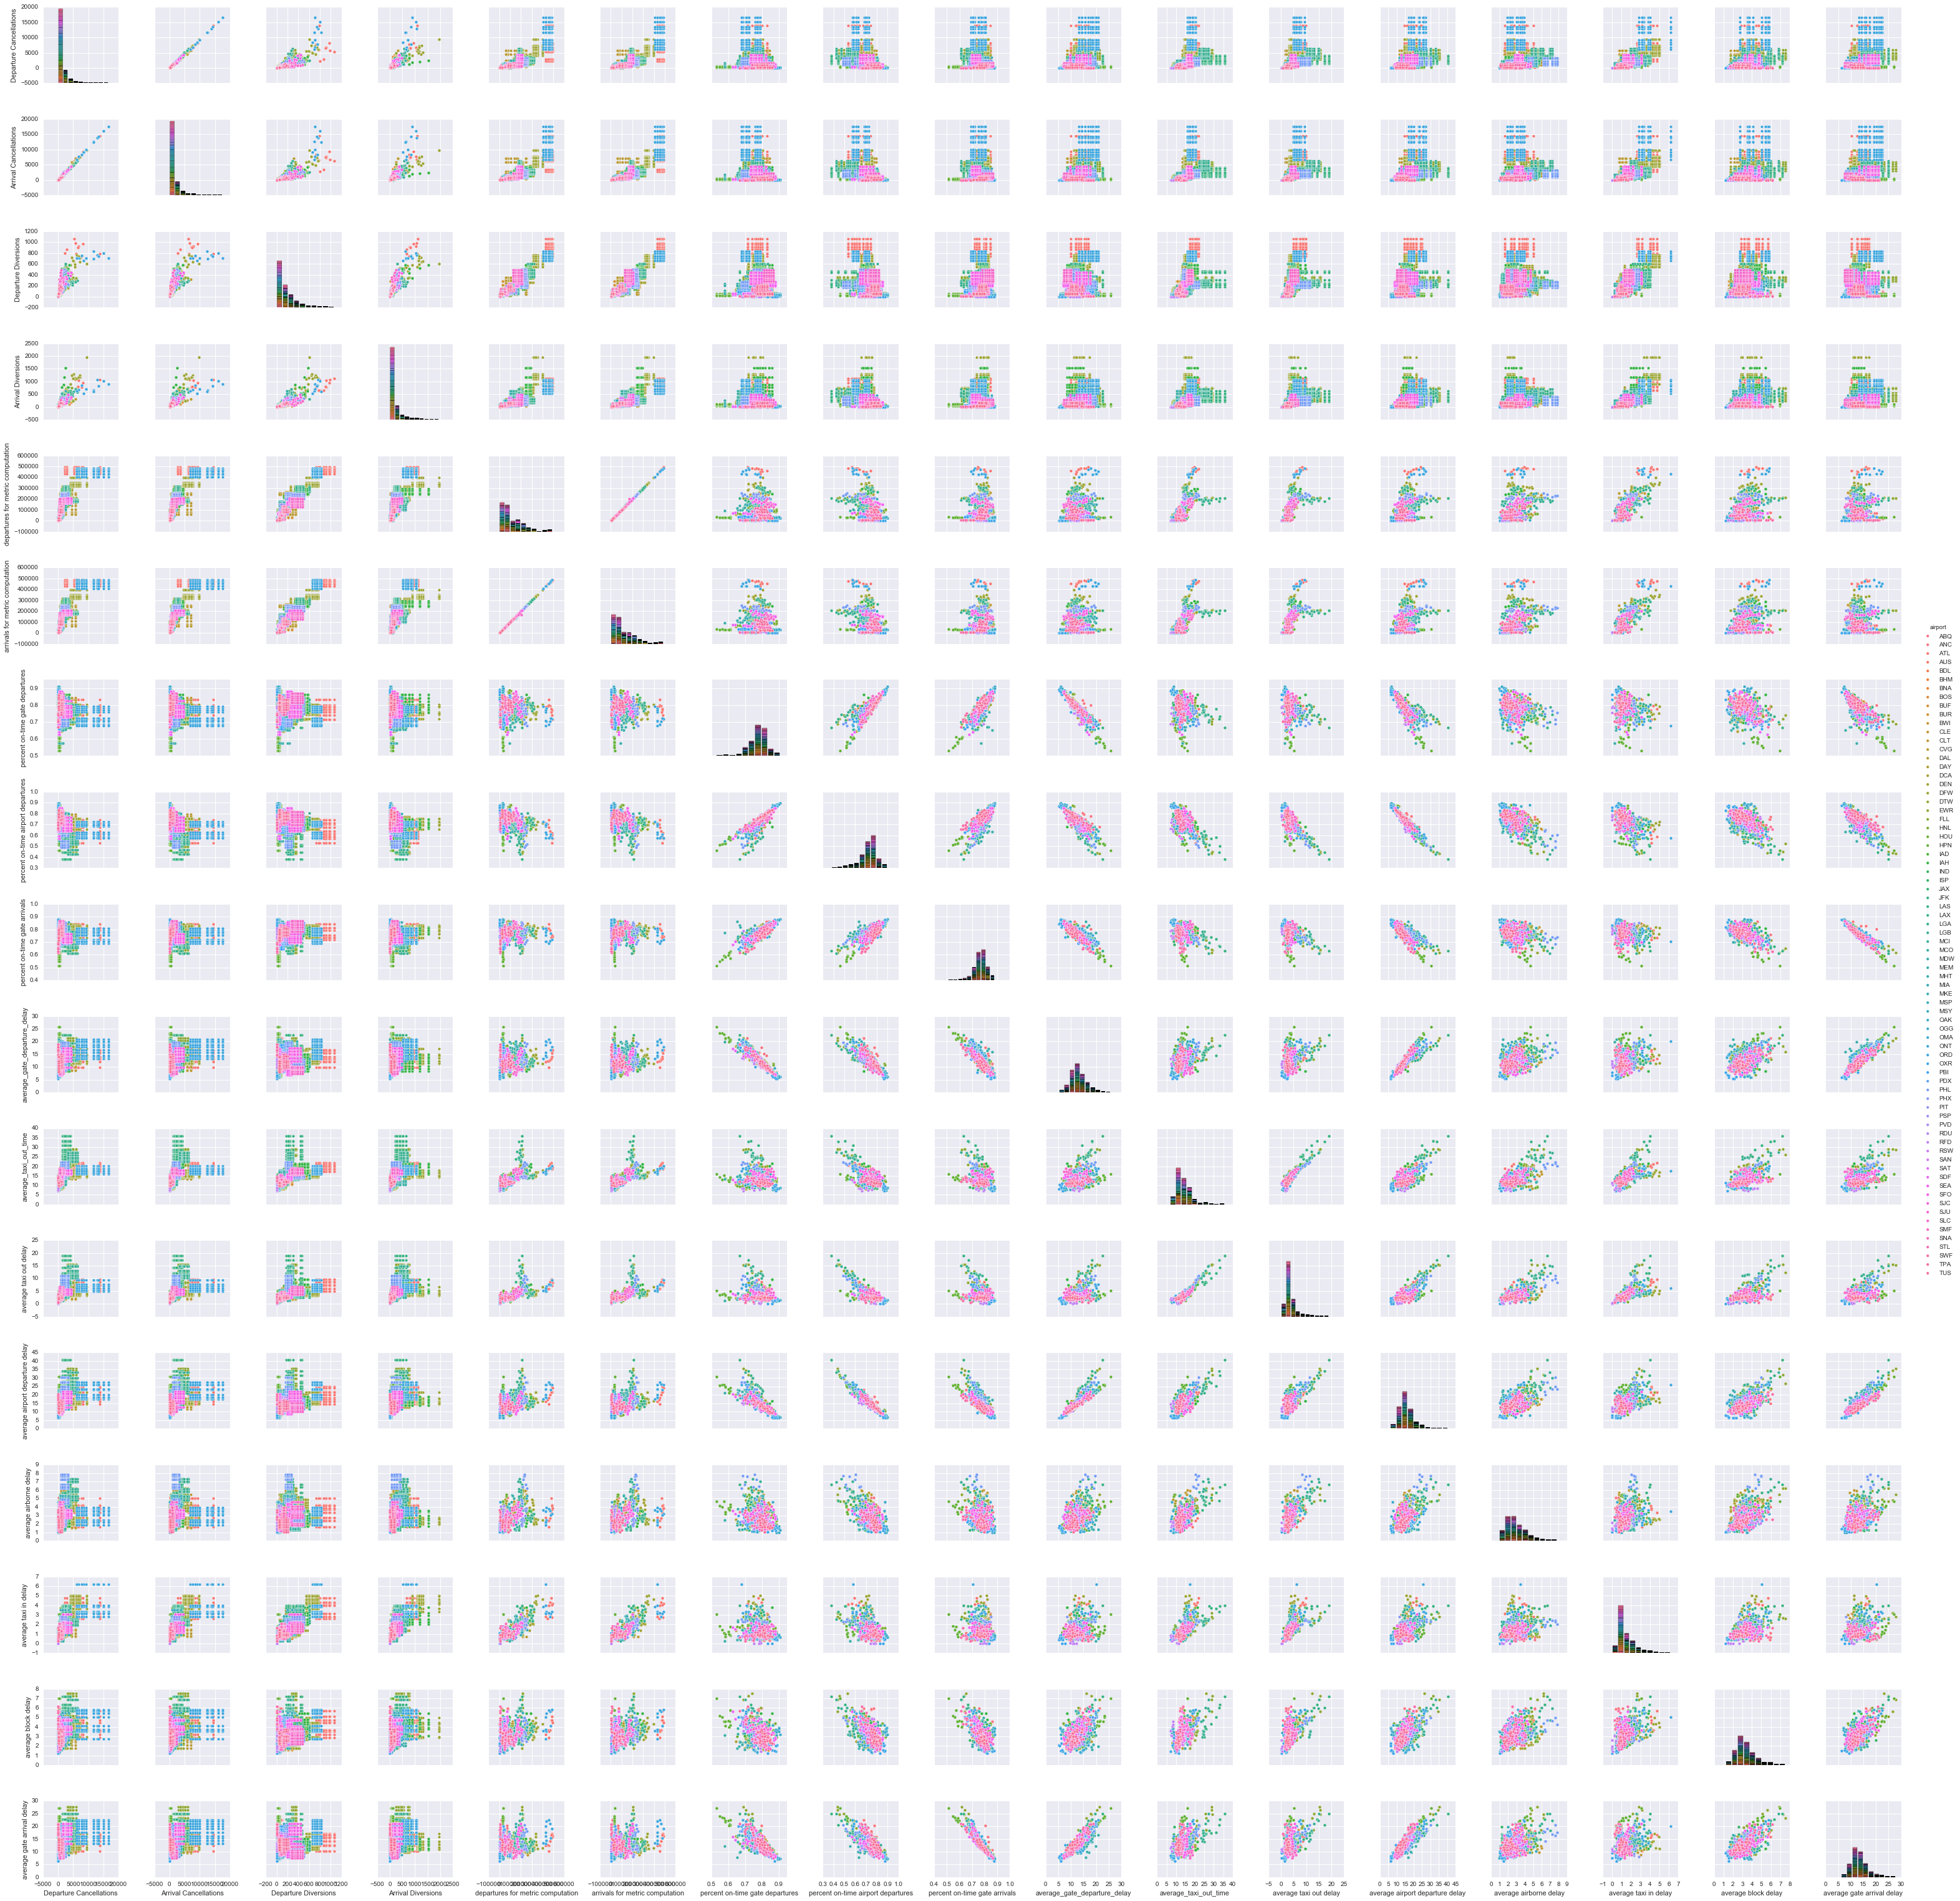

In [51]:
sns.set()
sns.pairplot(overallOperations, hue="airport")

#### 1.2 What are the risks and assumptions of our data? 

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [55]:
percent_on_time = overallOperations[['airport','percent on-time gate departures','percent on-time airport departures','percent on-time gate arrivals','average_taxi_out_time']]

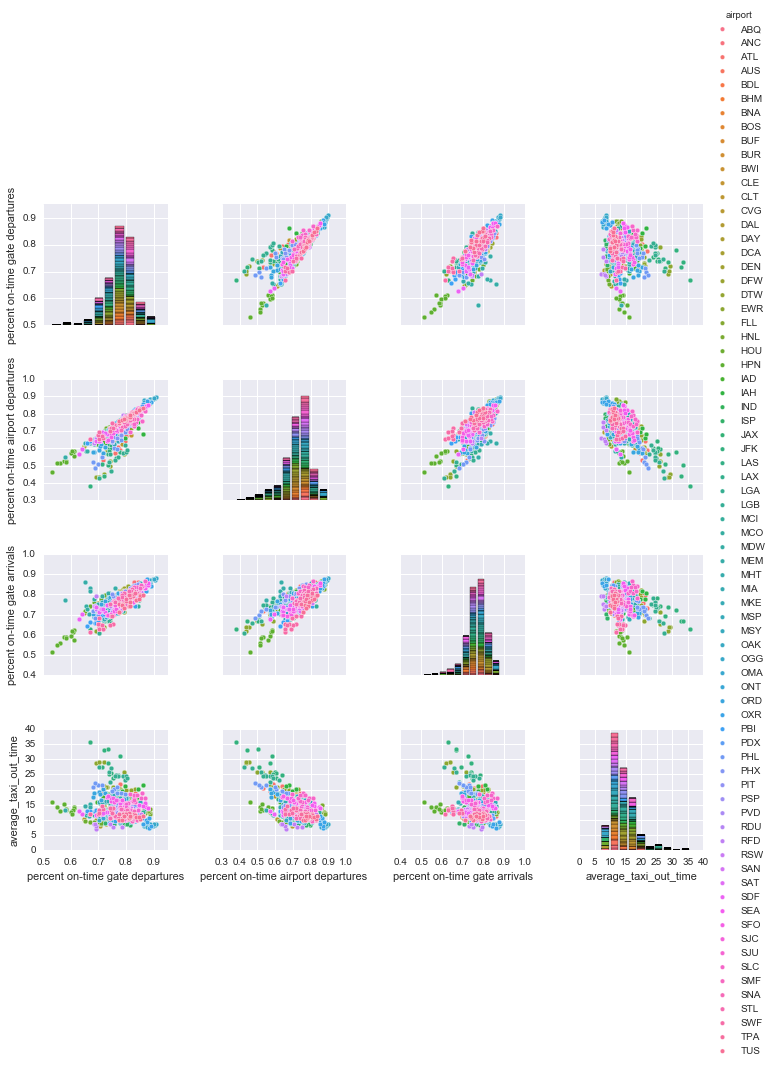

In [56]:
sns.set()
sns.pairplot(percent_on_time, hue="airport")

In [ ]:
percent_on_time = overallOperations[['airport','percent on-time gate departures','percent on-time airport departures','percent on-time gate arrivals','average_taxi_out_time']]

#### Are there any unique values? 

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

#### 3.2 Format and Clean the Data

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

#### 4.2 Find correlations in the data

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: 

#### 4.4 Validate your findings using statistical analysis

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA and Present Findings

#### 5.1 Conduct the PCA

In [ ]:
# Create a clean data frame 
ap1 = ap[['airport','year','departure cancellations','arrival cancellations']]
print ap1.head()

#### 5.2 Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps

### Part 6: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied